### Notes

* Merge sort is divide-and-conquer.
* It relies on a merge algorithm, which takes two sorted piles $P_1[p..q]$ and $P_2[q + 1..r]$ and renders them into one pile $A[p..r]$.
* The merge algorithm places $n=r -p + 1$ cards in the pile, a fact we take advantage of to avoid ever checking if a list is empty. It is $O(n)$.
* Merge sort recursively breaks an array into halves, and runs a merge sort on these halves.

### Python `merge` implementation

In [17]:
# The book implementation, with C-like details adapted to Python.

def merge(p1, p2):
    i = j = 0  # Starting indices
    n = len(p1) + len(p2)  # Number of iterations to be used
    ret = []  # The merged array we are building
    # Sentinel values which cannot be exceeded on the comparison check.
    p1.append(float("inf"))
    p2.append(float("inf"))
    # n is known to be the # of iterations needed, but we don't actually need the iter #.
    for _ in range(n):
        if p1[i] < p2[j]:
            ret.append(p1[i])
            i += 1
        else:
            ret.append(p2[j])
            j += 1
    return ret

In [18]:
merge([1,2],[3,4])

[1, 2, 3, 4]

In [45]:
# A more Pythonic duck test implementation.

def merge_alt(p1, p2):
    ret = []  # The merged array we are building
    while True:
        try:
            if p1[0] < p2[0]:
                ret.append(p1.pop(0))
            else:
                ret.append(p2.pop(0))
        except IndexError:
            nonempty_array = p2 if (len(p1) == 0) else p1
            ret += nonempty_array
            return ret

In [46]:
merge_alt([1,2],[3,4])

[1, 2, 3, 4]

### Python `merge` tests

In [49]:
import hypothesis.strategies as st
from hypothesis import given

@given(a=st.lists(st.integers()), b=st.lists(st.integers()))
def test_merge(a, b):
    sorted(a + b) == merge(a, b)

@given(a=st.lists(st.integers()), b=st.lists(st.integers()))
def test_merge_alt(a, b):
    sorted(a + b) == merge_alt(a, b)

    
test_merge()
test_merge_alt()

### Python `merge sort` implementation

In [50]:
def merge_sort(arr):
    if len(arr) == 1: return arr
    else:
        pivot = int(len(arr) / 2)
        a, b = merge_sort(arr[:pivot]), merge_sort(arr[pivot:])
        return merge(a, b)

In [54]:
merge_sort([5,2,4,6,1,3])

[1, 2, 3, 4, 5, 6]

### Formal timing

Splitting occurs $log(n)$ times and each merge is an $\Theta (n)$ operation, making the overall algorithm $\Theta(nlog(n))$.

Neither the merge nor the splitting operations are affected by the order that the underlying data is in, so the best and worst cases are also $\Theta(nlog(n))$. This is a disadvantage compared to other algorithms which *do* speed up when the data is in order. In practice, for this reason, merge sort is usually implemented with some kind of fast statistical entropy test in order to determine whether or not it is worth using.

### Python timing

In [55]:
from time import time

def timer(func, *args, **kwargs):
    start = time()
    func(*args, **kwargs)
    end = time()
    return end - start

In [60]:
import numpy as np

best = []
mid = []
worst = []

ns = np.logspace(0, 4, num=40)
for n in ns:
    n_ints = np.random.random(n)
    
    mid.append(timer(merge_sort, list(n_ints)))
    best.append(timer(merge_sort, list(sorted(n_ints))))
    worst.append(timer(merge_sort, list(sorted(n_ints)[::-1])))

C:\Users\Alex\Anaconda3\envs\algos\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


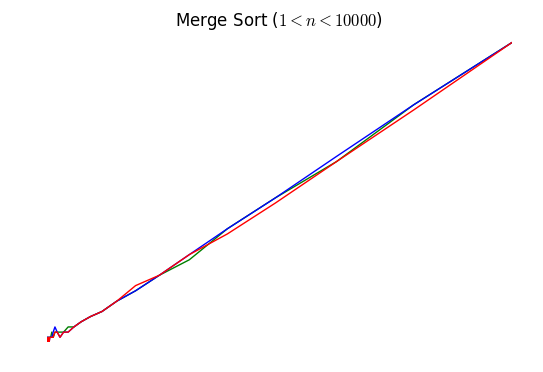

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ns, best, color='green')
plt.plot(ns, mid, color='blue')
plt.plot(ns, worst, color='red')
ax = plt.gca()
ax.axis('off')
plt.title("Merge Sort ($1 < n < 10000$)")

### JavaScript implementation

In [81]:
%%javascript

window.merge = function merge(p1, p2) {
    // What I learned while writing this: the duck test implementation used in Python can't be done as easily in
    // JavaScript because of the language's weirdness---asking for p1[i] for a non-existant index i will return null,
    // *not* throw an exception. Wicked! So this code uses th book implementation.
    var i = 0;
    var j = 0;
    var n = p1.length + p2.length;
    var ret = [];
    p1.push(Infinity);
    p2.push(Infinity);
    for (var c = 0; c < n; c++) {
        if (p1[i] < p2[j]) {
            ret.push(p1[i]);
            i++;
        }
        else {
            ret.push(p2[j]);
            j++;
        }
    }
    return ret;
}

window.merge_sort = function merge_sort(arr) {
    if (arr.length == 1) { return arr; }
    else {
        var pivot = Math.round(arr.length / 2);
        var left = merge_sort(arr.slice(0, pivot));
        var right = merge_sort(arr.slice(pivot));
        return merge(left, right);
    }
}

window.print = function(id, output) { document.getElementById(id).innerHTML = String(output) }

<IPython.core.display.Javascript object>

In [82]:
%%html

<g id="holder_1"></g>
<script>window.print("holder_1", window.merge_sort([5,2,4,6,1,3]))</script>

In [84]:
!mocha -g "Merge Sort"



  Merge Sort (JSVerify)
    âˆš works


  1 passing (7ms)

